In [1]:
import numpy as np
import scipy.stats as st


In [2]:
st.randint
st.binom
st.poisson

st.uniform
st.norm

# st.randint??

Notes
-----

The probability mass function for `randint` is:

.. math::
$
    f(k) = \frac{1}{high - low}
$

for ``k = low, ..., high - 1``.

`randint` takes ``low`` and ``high`` as shape parameters.



In [9]:
class randint_gen(st.rv_discrete):
    r"""A uniform discrete random variable.

    %(before_notes)s

    Notes
    -----
    The probability mass function for `randint` is:

    .. math::

        f(k) = \frac{1}{high - low}

    for ``k = low, ..., high - 1``.

    `randint` takes ``low`` and ``high`` as shape parameters.

    %(after_notes)s

    %(example)s

    """
    def _argcheck(self, low, high):
        return (high > low)

    def _get_support(self, low, high):
        return low, high-1

    def _pmf(self, k, low, high):
        # randint.pmf(k) = 1./(high - low)
        p = np.ones_like(k) / (high - low)
        return np.where((k >= low) & (k < high), p, 0.)

    def _cdf(self, x, low, high):
        k = floor(x)
        return (k - low + 1.) / (high - low)

    def _ppf(self, q, low, high):
        vals = ceil(q * (high - low) + low) - 1
        vals1 = (vals - 1).clip(low, high)
        temp = self._cdf(vals1, low, high)
        return np.where(temp >= q, vals1, vals)

    def _stats(self, low, high):
        m2, m1 = np.asarray(high), np.asarray(low)
        mu = (m2 + m1 - 1.0) / 2
        d = m2 - m1
        var = (d*d - 1) / 12.0
        g1 = 0.0
        g2 = -6.0/5.0 * (d*d + 1.0) / (d*d - 1.0)
        return mu, var, g1, g2

    def _rvs(self, low, high, size=None, random_state=None):
        """An array of *size* random integers >= ``low`` and < ``high``."""
        if np.asarray(low).size == 1 and np.asarray(high).size == 1:
            # no need to vectorize in that case
            return rng_integers(random_state, low, high, size=size)

        if size is not None:
            # NumPy's RandomState.randint() doesn't broadcast its arguments.
            # Use `broadcast_to()` to extend the shapes of low and high
            # up to size.  Then we can use the numpy.vectorize'd
            # randint without needing to pass it a `size` argument.
            low = np.broadcast_to(low, size)
            high = np.broadcast_to(high, size)
        randint = np.vectorize(partial(rng_integers, random_state),
                               otypes=[np.int_])
        return randint(low, high)

    def _entropy(self, low, high):
        return log(high - low)


randint= randint_gen(
    name='randint', 
    longname='A discrete uniform (random integer)')


In [17]:
#
# Author:  Travis Oliphant  2002-2011 with contributions from
#          SciPy Developers 2004-2011
#
from functools import partial
from scipy import special
from scipy.special import entr, logsumexp, betaln, gammaln as gamln
from scipy._lib._util import _lazywhere, rng_integers

from numpy import floor, ceil, log, exp, sqrt, log1p, expm1, tanh, cosh, sinh

import numpy as np

from scipy.stats._distn_infrastructure import (
        rv_discrete, _ncx2_pdf, _ncx2_cdf, get_distribution_names)

In [21]:

randint._rvs(low= 10, high= 20, size= 100)

array([15, 13, 11, 14, 16, 11, 15, 13, 11, 14, 15, 14, 17, 10, 16, 19, 10,
       17, 16, 12, 18, 17, 18, 15, 10, 16, 19, 18, 16, 10, 14, 16, 15, 13,
       17, 18, 13, 14, 15, 10, 19, 19, 15, 18, 11, 18, 18, 11, 10, 12, 12,
       14, 12, 13, 17, 10, 15, 18, 19, 19, 13, 12, 10, 18, 15, 14, 10, 18,
       10, 14, 13, 19, 16, 12, 11, 14, 15, 16, 12, 16, 10, 16, 17, 10, 12,
       18, 11, 15, 19, 19, 12, 12, 18, 18, 11, 12, 10, 19, 18, 17],
      dtype=int64)

In [22]:
k= np.arange(0,30)
randint._pmf(k, low= 10, high= 20)

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. ])

In [23]:
randint._cdf(k, low= 10, high= 20)

array([-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
        0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,
        1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

In [25]:
randint._stats(low= 10, high= 20)

(14.5, 8.25, 0.0, -1.2242424242424241)

In [26]:
randint._entropy(low= 10, high= 20)

2.302585092994046

In [27]:
q= np.linspace(0,1,101)
randint._ppf(q, low= 10, high= 20)


array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 16., 16., 16., 16.,
       16., 16., 16., 16., 16., 16., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18.,
       19., 19., 19., 19., 19., 19., 19., 19., 19., 19.])

In [32]:
st.randint.cdf(k, low=10, high=20) # 與 ._cdf 不同

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.2, 0.3,
       0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. ])

In [33]:
st.randint._cdf(k, low=10, high=20) # 與 .cdf 不同

array([-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
        0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,
        1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

In [34]:
st.randint.ppf(q, low= 10, high= 20)

array([ 9., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 16., 16., 16., 16.,
       16., 16., 16., 16., 16., 16., 17., 17., 17., 17., 17., 17., 17.,
       17., 17., 17., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18.,
       19., 19., 19., 19., 19., 19., 19., 19., 19., 19.])

In [37]:
st.randint._pdf?

Object `st.randint._pdf` not found.


In [38]:
import scipy


In [40]:
scipy.misc.derivative?


Signature: scipy.misc.derivative(func, x0, dx=1.0, n=1, args=(), order=3)
Docstring:
Find the nth derivative of a function at a point.

Given a function, use a central difference formula with spacing `dx` to
compute the nth derivative at `x0`.

Parameters
----------
func : function
    Input function.
x0 : float
    The point at which the nth derivative is found.
dx : float, optional
    Spacing.
n : int, optional
    Order of the derivative. Default is 1.
args : tuple, optional
    Arguments
order : int, optional
    Number of points to use, must be odd.

Notes
-----
Decreasing the step size too small can result in round-off error.

Examples
--------
>>> from scipy.misc import derivative
>>> def f(x):
...     return x**3 + x**2
>>> derivative(f, 1.0, dx=1e-6)
4.9999999999217337
File:      m:\programdata\anaconda3\lib\site-packages\scipy\misc\common.py
Type:      function


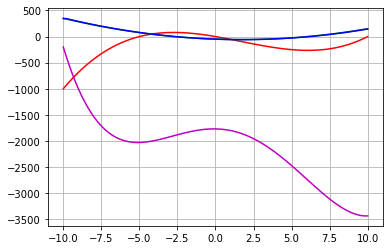

In [76]:
# numpy 版的微積分

def f(x):
    y= (x-10)*x*(x+5)
    return y
x= np.linspace(-10,10,101)
y= f(x)

dydx= scipy.misc.derivative(f,x)

def diff(f,x):
    dx= (x[-1]-x[0])/(len(x)-1)
    dy_dx= np.diff(f(x))/dx
    dy_dx= np.insert(dy_dx,0,dy_dx[0])
    return dy_dx

dydx2= diff(f,x)

def integrate(f,x):
    dx= (x[-1]-x[0])/(len(x)-1)
    Sydx= np.cumsum(f(x))*dx
    return Sydx

intg= integrate(f,x)

import matplotlib.pyplot as pl
pl.plot(x,y,'r',
        x,dydx,'g',
        x,dydx2,'b',
        x, intg,'m')
pl.grid()


In [56]:
x= np.linspace(0,10,101)
x= np.insert(x,0,100)
x

array([100. ,   0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,
         0.8,   0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,
         1.7,   1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,
         2.6,   2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,
         3.5,   3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,
         4.4,   4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,
         5.3,   5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,
         6.2,   6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,
         7.1,   7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,
         8. ,   8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,
         8.9,   9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,
         9.8,   9.9,  10. ])

In [77]:
#scipy.integrate.quad?

In [78]:
import numpy as np

In [79]:
np.random?

Type:        module
String form: <module 'numpy.random' from 'M:\\ProgramData\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>
File:        m:\programdata\anaconda3\lib\site-packages\numpy\random\__init__.py
Docstring:  
Random Number Generation

Use ``default_rng()`` to create a `Generator` and call its methods.

=============== =========================================================
Generator
--------------- ---------------------------------------------------------
Generator       Class implementing all of the random number distributions
default_rng     Default constructor for ``Generator``
=============== =========================================================

============================================= ===
BitGenerator Streams that work with Generator
--------------------------------------------- ---
MT19937
PCG64
Philox
SFC64
============================================= ===

============================================= ===
Getting entropy to initialize a BitGe

In [82]:
x= np.random.RandomState(0)    
x.binomial(n=10, p=.5, size=100)

array([5, 6, 5, 5, 5, 6, 5, 7, 8, 5, 6, 5, 5, 7, 3, 3, 2, 7, 6, 7, 8, 6,
       5, 6, 3, 6, 3, 7, 5, 5, 4, 6, 5, 5, 2, 5, 5, 5, 7, 6, 4, 5, 6, 3,
       6, 6, 4, 3, 4, 4, 5, 5, 8, 3, 4, 3, 6, 4, 5, 4, 3, 3, 6, 3, 4, 4,
       6, 3, 7, 3, 8, 5, 8, 5, 6, 2, 4, 3, 4, 3, 4, 5, 3, 6, 5, 4, 5, 3,
       5, 7, 4, 6, 3, 6, 4, 4, 5, 2, 7, 1])

In [97]:
x.standard_normal(size=100)

array([ 0.71422382,  2.28433335,  1.56410258,  0.61110371, -0.87736332,
       -1.6210875 , -0.581673  , -0.53783395, -1.55602368, -0.05446484,
       -1.81127879, -0.63117522, -0.92815918,  1.49072192,  0.19549934,
       -0.47160433,  1.81235465, -2.29413748,  0.65120935, -1.13049645,
       -0.77734666,  1.11593845,  1.33945302, -1.76743365,  0.42441246,
        1.08930905, -0.38418568,  0.63220141, -0.5496559 ,  0.52112574,
        0.10834955,  0.26166848, -0.91475533,  0.85823779,  0.09433429,
       -1.48590386, -1.90058426, -1.1375792 , -1.76203889, -0.28862322,
        1.04798222,  0.24995754,  0.04690446, -1.03224304,  0.40318568,
       -0.68405925,  1.26232219, -2.00555659, -0.3320304 , -0.2961004 ,
       -2.21836076, -0.18350288,  0.39230806,  0.24163481,  0.10393591,
       -0.82957119,  0.49275939,  0.09011279, -0.99756754, -0.80003821,
        0.20707557,  0.52346303, -0.69939482,  0.91370581, -0.67278478,
        0.1333245 ,  0.42689602, -0.01284939, -0.35224831,  0.81

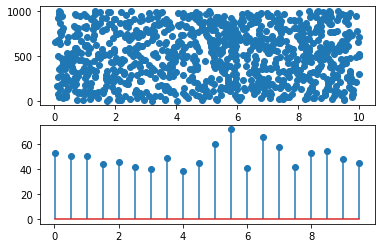

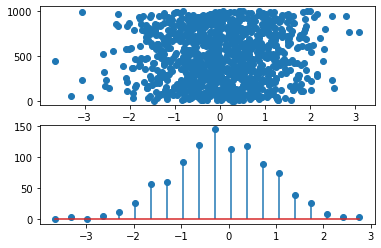

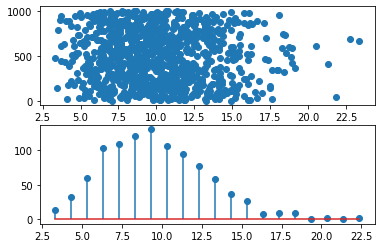

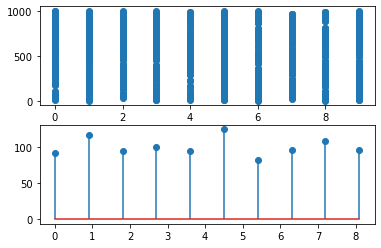

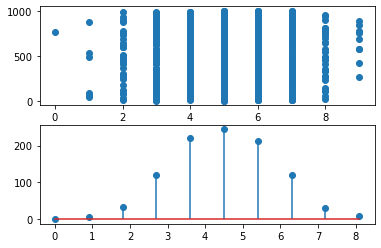

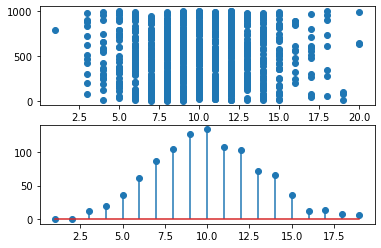

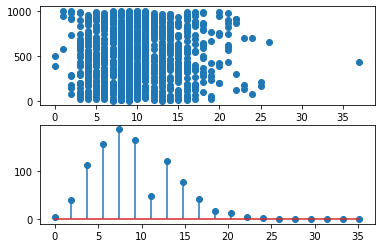

In [439]:
#
# 各種分布，使用 np.histogram() 來初步了解
# 每種分布皆有各自的參數以及獨特的數學公式
#

import numpy as np
import matplotlib.pyplot as pl

#rg=  np.random.default_rng()

size= 1000

XL= []
X= np.random.uniform(low=0, high=10,size= size)
XL += [X]

X= np.random.standard_normal(size= size)
XL += [X]

X= np.random.standard_gamma(shape=10, size= size)
XL += [X]

X= np.random.randint(low=0, high=10, size=size)
XL += [X]

X= np.random.binomial(n= 10, p= .5, size= size)
XL += [X]

X= np.random.poisson(lam=10, size= size)
XL += [X]

X= np.random.negative_binomial(n= 10, p=.5, size= size)
XL += [X]

for X in XL:
    # 針對離散型，也許 nbins 要精細一點計算
    nbins= len(set(X))
    nbins= min(nbins, 20)

    f,x= np.histogram(X, bins= nbins)
    x= x[:-1]


    fg, ax= pl.subplots(2,1)
    t=      np.arange(len(X))
    ax[0].scatter(X, t)
    ax[1].stem(x, f)

#f,x

In [456]:
import scipy.stats as st
#st.rv_histogram?
f,x= np.histogram(X, bins= nbins)
hist_dist= st.rv_histogram((f,x))
hist_dist.var()

21.244978230833325

In [447]:
st.rv_histogram?

Init signature: st.rv_histogram(histogram, *args, **kwargs)
Docstring:     
Generates a distribution given by a histogram.
This is useful to generate a template distribution from a binned
datasample.

As a subclass of the `rv_continuous` class, `rv_histogram` inherits from it
a collection of generic methods (see `rv_continuous` for the full list),
and implements them based on the properties of the provided binned
datasample.

Parameters
----------
histogram : tuple of array_like
  Tuple containing two array_like objects
  The first containing the content of n bins
  The second containing the (n+1) bin boundaries
  In particular the return value np.histogram is accepted

Notes
-----
There are no additional shape parameters except for the loc and scale.
The pdf is defined as a stepwise function from the provided histogram
The cdf is a linear interpolation of the pdf.

.. versionadded:: 0.19.0

Examples
--------

Create a scipy.stats distribution from a numpy histogram

>>> import scipy.s

In [400]:

#rg.standard_gamma?
rg.negative_binomial?


Docstring:
negative_binomial(n, p, size=None)

Draw samples from a negative binomial distribution.

Samples are drawn from a negative binomial distribution with specified
parameters, `n` successes and `p` probability of success where `n`
is > 0 and `p` is in the interval (0, 1].

Parameters
----------
n : float or array_like of floats
    Parameter of the distribution, > 0.
p : float or array_like of floats
    Parameter of the distribution. Must satisfy 0 < p <= 1.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``n`` and ``p`` are both scalars.
    Otherwise, ``np.broadcast(n, p).size`` samples are drawn.

Returns
-------
out : ndarray or scalar
    Drawn samples from the parameterized negative binomial distribution,
    where each sample is equal to N, the number of failures that
    occurred before a total of n successes wa

In [214]:
rg.uniform?

Docstring:
uniform(low=0.0, high=1.0, size=None)

Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval
``[low, high)`` (includes low, but excludes high).  In other words,
any value within the given interval is equally likely to be drawn
by `uniform`.

Parameters
----------
low : float or array_like of floats, optional
    Lower boundary of the output interval.  All values generated will be
    greater than or equal to low.  The default value is 0.
high : float or array_like of floats
    Upper boundary of the output interval.  All values generated will be
    less than high.  The default value is 1.0.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``low`` and ``high`` are both scalars.
    Otherwise, ``np.broadcast(low, high).size`` samples are drawn.

Returns
-------
out : n

In [215]:
np.random.randint?

Docstring:
randint(low, high=None, size=None, dtype=int)

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the ``integers`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-like, must contain integer values
size : int or tuple of ints, optional
    Output shape.  If the given shape is, 

In [436]:
dir(np.random)

['BitGenerator',
 'Generator',
 'MT19937',
 'PCG64',
 'Philox',
 'RandomState',
 'SFC64',
 'SeedSequence',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bounded_integers',
 '_common',
 '_generator',
 '_mt19937',
 '_pcg64',
 '_philox',
 '_pickle',
 '_sfc64',
 'beta',
 'binomial',
 'bit_generator',
 'bytes',
 'chisquare',
 'choice',
 'default_rng',
 'dirichlet',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponential',
 'stand

In [438]:
np.random.zipf?

Docstring:
zipf(a, size=None)

Draw samples from a Zipf distribution.

Samples are drawn from a Zipf distribution with specified parameter
`a` > 1.

The Zipf distribution (also known as the zeta distribution) is a
continuous probability distribution that satisfies Zipf's law: the
frequency of an item is inversely proportional to its rank in a
frequency table.

.. note::
    New code should use the ``zipf`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
a : float or array_like of floats
    Distribution parameter. Must be greater than 1.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``a`` is a scalar. Otherwise,
    ``np.array(a).size`` samples are drawn.

Returns
-------
out : ndarray or scalar
    Drawn samples from the parameterized Zipf distribution.

Se